In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import preprocessing, svm
%load_ext autoreload
%autoreload 2

In [2]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
men_wr=pd.read_html("https://en.wikipedia.org/wiki/Men%27s_100_metres_world_record_progression")
women_wr=pd.read_html("https://en.wikipedia.org/wiki/Women%27s_100_metres_world_record_progression")

women_wr = pd.DataFrame(women_wr[2]).append(pd.DataFrame(women_wr[3]))
men_wr = pd.DataFrame(men_wr[4])

In [4]:
men_wr

,Time,Wind,Auto,Athlete,Nationality,Location of race,Date,Notes[note 2],Duration of record
0,10.06,1.3,NaN,Bob Hayes,United States,"Tokyo, Japan","October 15, 1964",[5],"3 years, 8 months and 5 days"
1,10.03,0.8,NaN,Jim Hines,United States,"Sacramento, USA","June 20, 1968",[5],3 months and 23 days
2,10.02,2.0,NaN,Charles Greene,United States,"Mexico City, Mexico","October 13, 1968",A[5],1 day
3,9.95,0.3,NaN,Jim Hines,United States,"Mexico City, Mexico","October 14, 1968","OR, A[2]","14 years, 8 months and 19 days"
4,9.93,1.4,NaN,Calvin Smith,United States,"Colorado Springs, USA","July 3, 1983",A[2],"4 years, 1 month and 27 days"
5,9.83,1.0,NaN,Ben Johnson,Canada,"Rome, Italy","August 30, 1987",[note 3],0 days
6,9.93,1.0,NaN,Carl Lewis,United States,"Rome, Italy","August 30, 1987",[5][6][note 4],11 months and 18 days
7,9.93,1.1,NaN,Carl Lewis,United States,"Zürich, Switzerland","August 17, 1988",[2],1 month and 7 days
8,9.79,1.1,NaN,Ben Johnson,Canada,"Seoul, South Korea","September 24, 1988",[note 3][2],0 days
9,9.92,1.1,NaN,Carl Lewis,United States,"Seoul, South Korea","September 24, 1988",OR[note 3][2],"2 years, 8 months and 21 days"


In [5]:
women_wr

,Time,Wind,Athlete,Nationality,Location,Date
0,11.07,1.2,Wyomia Tyus,United States,"Mexico City, Mexico","October 15, 1968[1]"
1,11.07,0.2,Renate Stecher (née Meißner),East Germany,"Munich, West Germany","September 2, 1972[1]"
2,11.04,0.6,Inge Helten,West Germany,"Fürth, West Germany","June 13, 1976[1]"
3,11.01,0.6,Annegret Richter,West Germany,"Montreal, Canada","July 25, 1976[1]"
4,10.88,2.0,Marlies Oelsner,East Germany,"Dresden, East Germany","July 1, 1977[1]"
5,10.88,1.9,Marlies Göhr,East Germany,"Karl-Marx-Stadt, East Germany","July 9, 1982[1]"
6,10.81,1.7,Marlies Göhr,East Germany,"Berlin, East Germany","June 8, 1983[1]"
7,10.79,0.6,Evelyn Ashford,United States,"US Air Force Academy, United States","July 3, 1983[1]"
8,10.76,1.7,Evelyn Ashford,United States,"Zürich, Switzerland","August 22, 1984[1]"
9,10.49,0.0*,Florence Griffith-Joyner,United States,"Indianapolis, United States","July 16, 1988[1]"


In [6]:
women_wr['WR_Year']  = pd.DatetimeIndex(women_wr['Date'].str.slice(stop =-3)).year
men_wr['WR_Year'] = pd.DatetimeIndex(men_wr['Date']).year
men_wr['Wind'] = men_wr['Wind'].str.slice(stop =3).astype(float)

In [7]:
type(men_wr['Wind'][0])

numpy.float64

In [8]:
#dataSet =  women_wr[['WR_Year', 'Time', 'Wind']]
dataSet =  men_wr[['WR_Year', 'Time', 'Wind']]

In [9]:
dataSet

,WR_Year,Time,Wind
0,1964,10.06,1.3
1,1968,10.03,0.8
2,1968,10.02,2.0
3,1968,9.95,0.3
4,1983,9.93,1.4
5,1987,9.83,1.0
6,1987,9.93,1.0
7,1988,9.93,1.1
8,1988,9.79,1.1
9,1988,9.92,1.1


Data Preparation

In [10]:
WR_year = dataSet[['WR_Year']].values.reshape(-1, 1)
WR_time = dataSet['Time'].values.reshape(-1, 1)
#men_wr.fillna(method ='ffill', inplace = True) #eliminate missing data

In [11]:
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column

X_train, X_test, y_train, y_test = train_test_split(WR_year, WR_time, test_size=0.33)


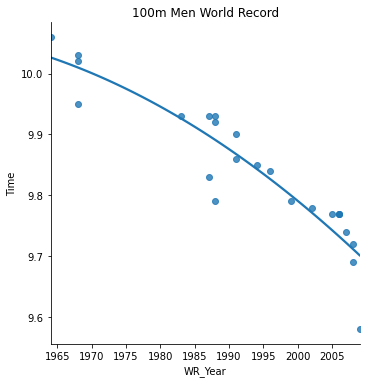

In [12]:
#plotting the Scatter plot to check relationship between Year and WR time
sns.lmplot(x ="WR_Year", y ="Time", data = dataSet, order = 2, ci = None)

ax = plt.gca()

ax.set_title('100m Men World Record')

plt.show()

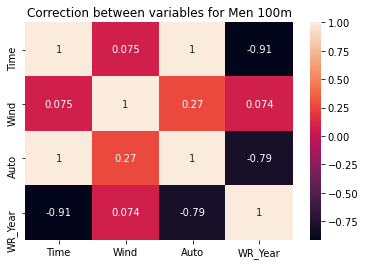

In [13]:
sns.heatmap(men_wr.corr(), annot=True) #here we use data because it only includes the necessary features
ax = plt.gca()

ax.set_title('Correction between variables for Men 100m')

plt.show()

### Linear Regression with SkLearn

In [14]:
# Splitting the data into training and testing data
regr = linear_model.LinearRegression()

In [15]:
X_test

array([[2006],
       [1988],
       [2008],
       [1987],
       [1991],
       [1968],
       [1988],
       [2007]], dtype=int64)

In [16]:
# training the model with the train data
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))


0.6746587056189617


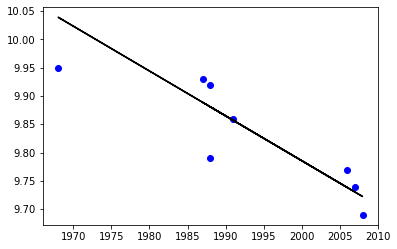

In [17]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()
# Data scatter of predicted values

In [18]:
# Make "actual" prediction
pred_value = list(range(2023, 2031))
y_pred_actual = regr.predict(np.array([pred_value]).reshape(-1,1))

Coefficients: 
 [[-0.00791189]]
Intercept: 
 [25.60959093]
Mean squared error: 0.00
Coefficient of determination: 0.67


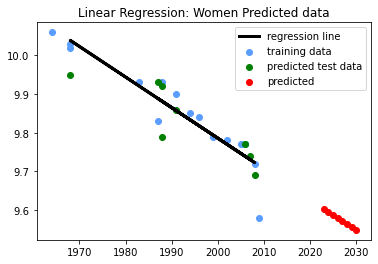

In [19]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The intercept
print('Intercept: \n', regr.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

plt.title('Linear Regression: Women Predicted data')
plt.scatter(X_train, y_train,  color='#5b9dff', label="training data")
plt.scatter(X_test, y_test,  color='green', label="predicted test data")
plt.plot(X_test, y_pred, color='000000', linewidth=3, label = "regression line")
plt.scatter(pred_value, y_pred_actual,  color='red', label="predicted")
plt.legend(loc=1)
plt.show()

In [22]:

from sklearn.metrics import mean_absolute_error,mean_squared_error
  
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.04213006186726709
MSE: 0.002695757631410383
RMSE: 0.05192068596821871


In [24]:
# https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     97.52
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           1.09e-07
Time:                        16:12:06   Log-Likelihood:                 27.541
No. Observations:                  16   AIC:                            -51.08
Df Residuals:                      14   BIC:                            -49.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.6096      1.596     16.045      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
